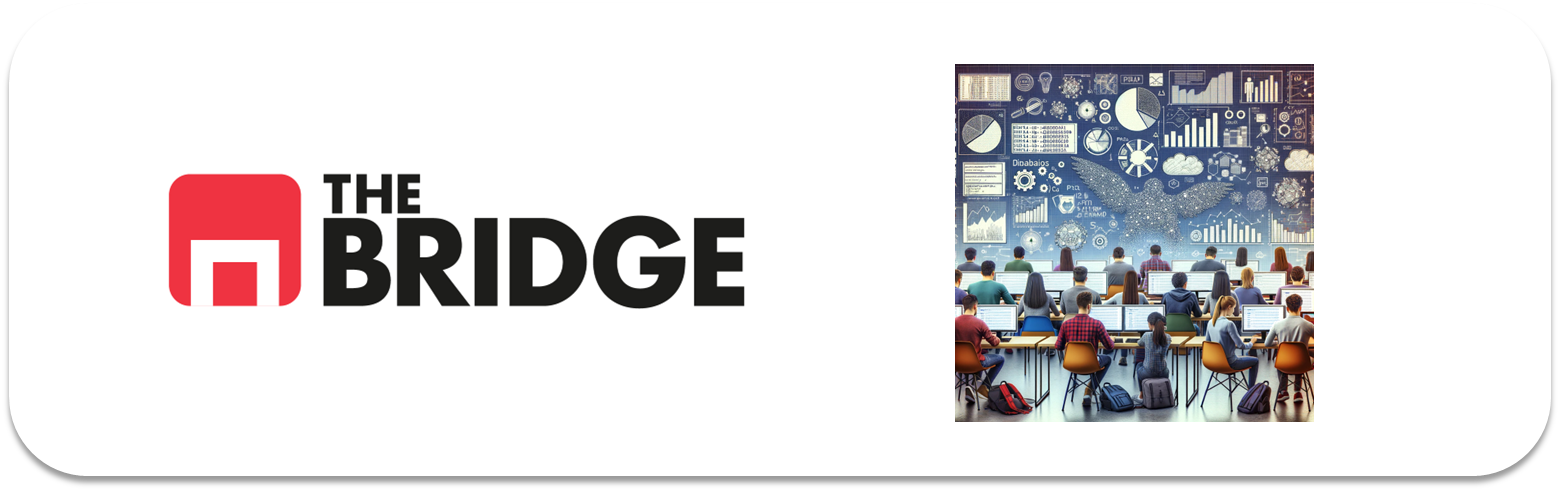

## PRÁCTICA OBLIGATORIA: **Clasificación y Regresión Logística**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as vt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

from scipy.stats import pearsonr

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



#### 1. Carga y limpieza inicial del dataset, visualización target

In [2]:
df = pd.read_csv('./data/titanic.csv')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
target = 'survived'
df = df.drop(columns = ['parch', 'embarked', 'class', 'adult_male', 'deck', 'alive', 'alone'])
df = df.dropna(subset = ['embark_town'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   fare         889 non-null    float64
 6   who          889 non-null    object 
 7   embark_town  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.5+ KB


Text(0.5, 0.98, 'Survived: no (0), yes (1)')

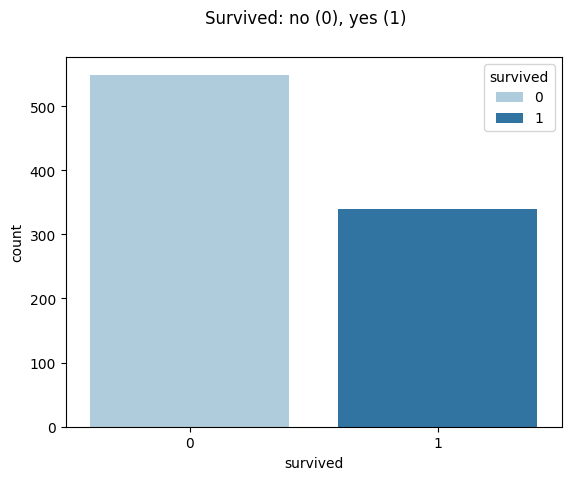

In [5]:
# Visualización target
sns.countplot(df, x = target, hue = target, palette = 'Paired')
plt.suptitle('Survived: no (0), yes (1)')

#### 2. Split train-test

In [6]:
target = 'survived'
train, test = train_test_split(df, test_size = 0.2, random_state = 42, stratify = df['embark_town'])

X_train = train.drop(target, axis = 1)
y_train = train[target]
X_test = test.drop(target, axis = 1)
y_test = test[target]

#### 3. Imputaciones

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       711 non-null    int64  
 1   sex          711 non-null    object 
 2   age          573 non-null    float64
 3   sibsp        711 non-null    int64  
 4   fare         711 non-null    float64
 5   who          711 non-null    object 
 6   embark_town  711 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 44.4+ KB


In [8]:
who_mean = X_train.groupby('who')['age'].transform('mean')
X_train['age'] = X_train['age'].fillna(who_mean)
X_test['age'] = X_test['age'].fillna(who_mean)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       711 non-null    int64  
 1   sex          711 non-null    object 
 2   age          711 non-null    float64
 3   sibsp        711 non-null    int64  
 4   fare         711 non-null    float64
 5   who          711 non-null    object 
 6   embark_town  711 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 60.6+ KB


#### 4. Mini-EDA

In [9]:
# Separamos features por tipo
features_num = X_train.select_dtypes(include = ['int64', 'float64']).columns.to_list()
features_num.remove('pclass')
features_cat = X_train.select_dtypes(include = 'object').columns.to_list()
features_cat.append('pclass')

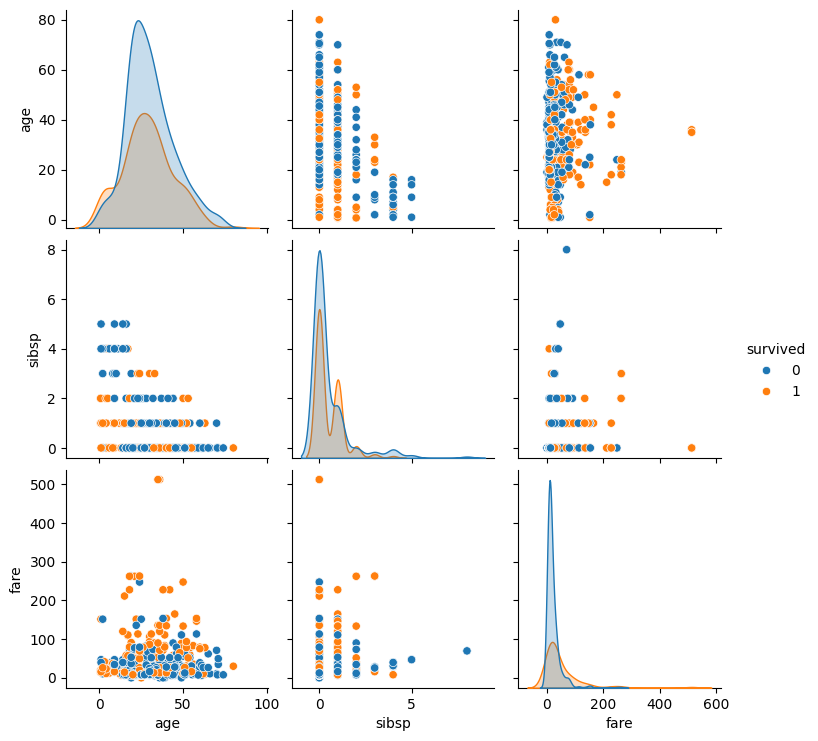

In [10]:
# Numéricas
# heatmap NO es correcto porque survived es categórica
sns.pairplot(train[features_num + [target]], hue = target);

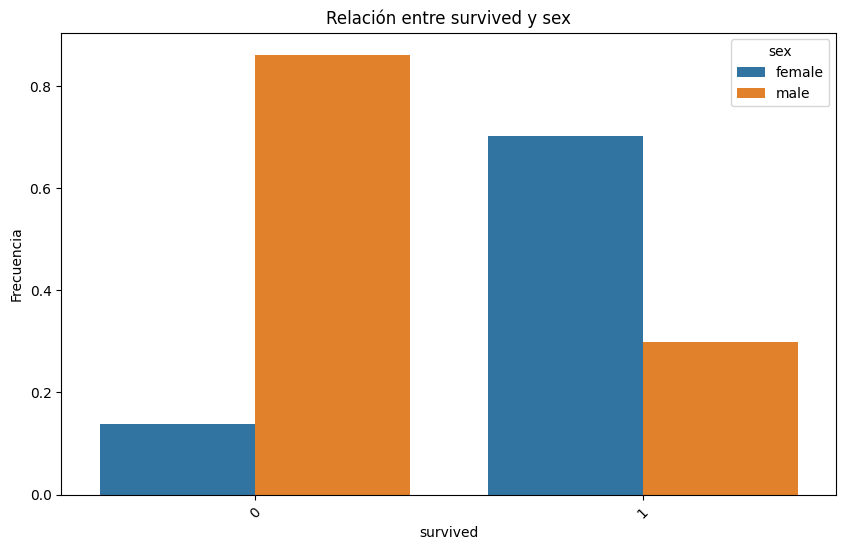

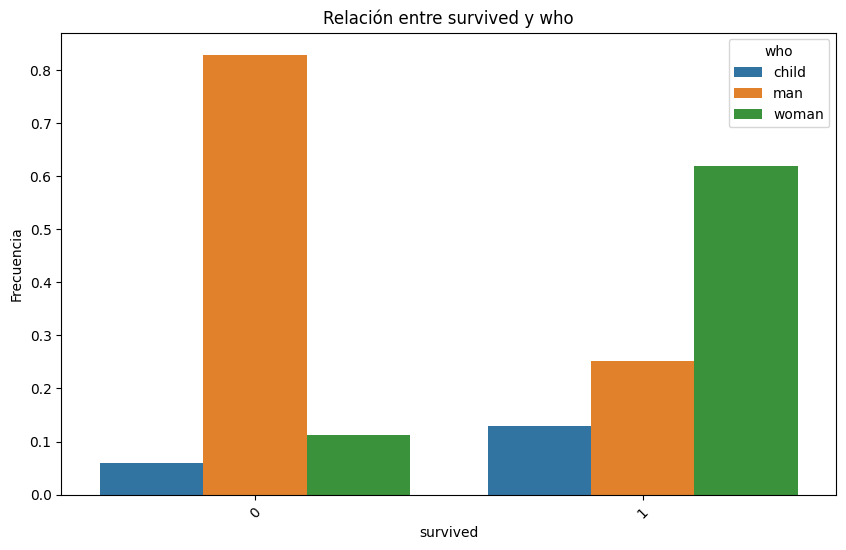

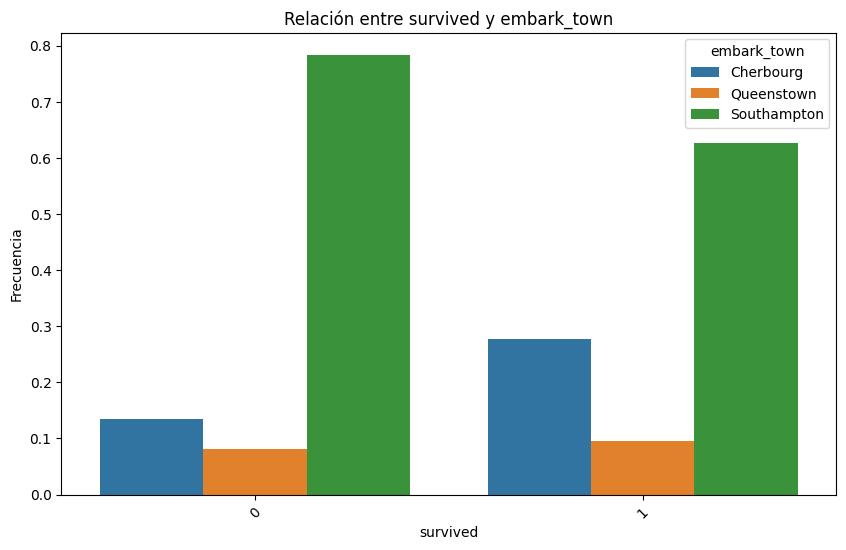

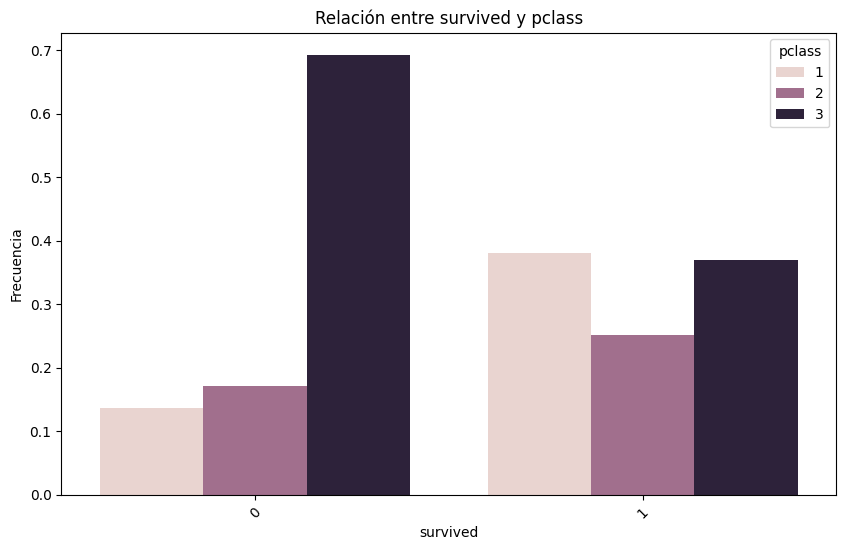

In [11]:
# Categóricas
for cat in features_cat:
    vt.plot_categorical_relationship_fin(train[features_cat + [target]], target, cat, relative_freq = True)

Las features que me quedon son:
* Numéricas: fare porque es la que más correlación tiene con target.
* Categóricas: pclass, who y embark_town, porque sex es redundante con who.

#### 4. Tratamiento variables

In [12]:
# Categóricas: who y embark_town
categories = [['child','woman','man'], ['Southampton','Cherbourg','Queenstown']]
encoder = OrdinalEncoder(categories = categories)

X_train[['who', 'embark_town']] = encoder.fit_transform(X_train[['who', 'embark_town']])
X_test[['who', 'embark_town']] = encoder.fit_transform(X_test[['who', 'embark_town']])


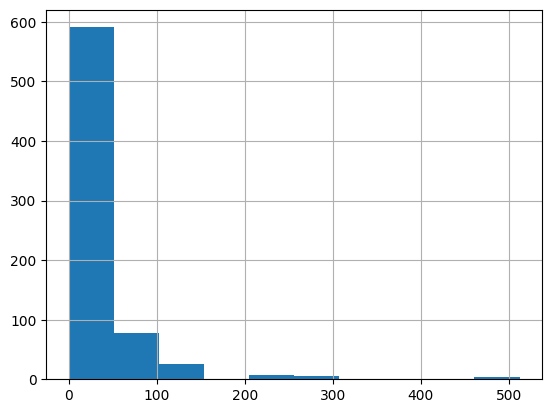

In [13]:
# Numéricas: fare
train['fare'].hist();

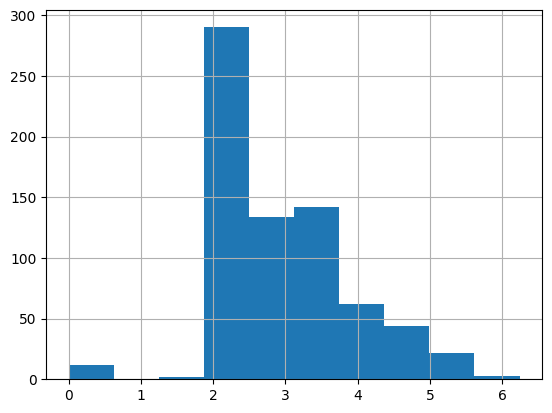

In [14]:
train['fare'] = train['fare'].apply(np.log1p) # se le suma 1 porque hay 0 y sino da error
train['fare'].hist();

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       711 non-null    int64  
 1   sex          711 non-null    object 
 2   age          711 non-null    float64
 3   sibsp        711 non-null    int64  
 4   fare         711 non-null    float64
 5   who          711 non-null    float64
 6   embark_town  711 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 60.6+ KB


* Modelo de regresión logística, 
* Evaluarlo contra un dataset de test reservado del original mostrando 
  * las métricas propias de los problemas de clasificación, 
  * la matriz de confusión y 
  * la curva ROC.
* Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.